<a href="https://colab.research.google.com/github/sofiaborgato/Network_dynaminc/blob/main/Homework03_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Howework 3
Lucia Innocenti, Sofia Borgato

In [ ]:
import networkx as nx
import numpy as np
import scipy as sp
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random
from datetime import datetime, timedelta
import math
import pandas as pd
import seaborn as sns
import operator

In [ ]:
def plotFunction(n_inf, inf, rec, susc, iterazioni, vac = None, n = 15):
    average_new_infected = np.mean(np.reshape(n_inf, (iterazioni,n)), axis = 0)
    average_infected = np.mean(np.reshape(inf, (iterazioni,15)), axis = 0)
    average_recovered = np.mean(np.reshape(rec, (iterazioni,15)), axis = 0)
    average_susceptible = np.mean(np.reshape(susc, (iterazioni,15)), axis = 0)
    if(vac is not None):
        average_vaccined = np.mean(np.reshape(vac, (iterazioni,15)), axis = 0)
    
    plt.plot(range(n),average_new_infected, linestyle='--', marker='o', 
             color='b', label ='average new infected')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.plot(range(15),average_infected, linestyle='--', marker='o', 
             color='b', label ='Average Infected')
    plt.plot(range(15),average_susceptible, linestyle='--', marker='o', 
             color='r', label ='Average Susceptible')
    plt.plot(range(15),average_recovered, linestyle='--', marker='o', 
             color='g', label ='Average Recovered')
    if(vac is not None):    
        plt.plot(range(15),average_vaccined, linestyle='--', marker='o', 
                 color='y', label ='Average Vaccined')
    plt.legend()
    plt.grid(True)
    plt.show()

### Exercise 1.1



In [ ]:
n_nodes = 500
k = 4

In [ ]:
G = nx.random_regular_graph(k, n_nodes, seed=None)

We set the parameters for the SIR epidec model: \\

* $\beta$ is the probability that the infection is spread from an infected individual to a susceptible one(given that they are connected by a link) during one time step, \\

* $\rho$ is the probability that an infected individual will recover during one time step, \\

* $\phi$ is the initial number of infected nodes.

In [ ]:
beta = .3
ro = .7
N = 100
fi = 10

We define the function $becameInfected()$ that recive two nodes, one infedected and one susceptible. It verifies that the two nodes are neighbors. 
The probability of being infected is computed as
$p = 1−(1−β)^m$ , where $m$ is the number of infected neighbors of S node.
Then we model this process as a binomial function havig has values \\
**[Infected with prob $p$; Not Infected with prob $(1-p)$]** \\

If the the node became infcted the function return true, else false.

In [ ]:
def becameInfected(node, infected, G, ro, beta):
    toCheck = G.neighbors(node)
    m = len(list(set(infected).intersection(toCheck))) 
    #m -> node neighbors actually infected
    p_infected = 1 - (1 - beta)**m
    res = np.random.choice(2, p=[p_infected, 1 - p_infected])
    if(res == 0):
        return True
    else:
        return False

We define the function $becameRecovered()$ that receves one Infected node. If the probability of the infected node of became recovered ($\rho$) is grater than a randomly generated number between [0,1] the I node became recovered.
If the node became recovered it return true, else false.

In [ ]:
def becameRecovery(node, G,ro, beta):
    p_recovery = ro
    cas = np.random.rand()
    if(p_recovery > cas):
        return True
    else:
        return False

We simulate on the same graph the behaivour of the pandemic for 15 weeks starting from 10 infected nodes and 490 susceptible nodes. When an infected node became recovered is no longer able to infect any other susceptible nodes, and also to be infected by any other infected node.
The simulation is repeated 100 times. 
The first ten infected are choosen randomly.
At each step (week) we iterate over all suceptible nodes and we evaluate, by the function $becameInfected()$ described before, if they switch their status.
Then we iterate over all infected nodes and, using to the function $becameRecovered()$, we define wich nodes are recovered at the end of the week. 
Finally we update the rapresentation with the new infected and the new recovered nodes.
So, in this approach, the new infected in week $n$ became an infected in week $n+1$. It means that a node became a new infected during the week starts spreading the virus the next one. This because we don't know exactly in which day of the week the node became infected, so if we allow all the new infected to immediatly be contagious, we give to all of them the same possibility of spread the virus and, consequently, it's like if we are assuming that all the nodes are become infected at the same moment (because, obviously, a node became infected on Monday has highest opportunity to infect someone in the week w.r.t a node infected on Saturday)

In [ ]:
n_inf = []
inf= []
rec = []
susc = []

for j in range(100):
    
    fi_nodes = np.random.choice(G.nodes, size = fi, replace = False)
    infected = set(fi_nodes)
    recovered = set()
    susceptible =  set(range(n_nodes)) - set(infected) - set(recovered) 
    
    for i in range(15): #15 weeks
        new_infected = []
        new_recovered = []
        for el in susceptible:
            if( becameInfected(el, infected, G,ro, beta) ):
                new_infected.append(el)
        for el in infected:
            if( becameRecovery(el, G, ro, beta)):
                new_recovered.append(el)
                
        n_inf.append(len(new_infected))
        inf.append(len(infected))
        rec.append(len(recovered))
        susc.append(len(susceptible))
        
        infected = infected.union( set(new_infected) ) - set(new_recovered) 
        recovered = recovered.union( set(new_recovered) )
        susceptible =  set(susceptible) - set(new_infected) - set(new_recovered)

The following plot has to be intended as avarage values on the 100 simulations on the same graph.

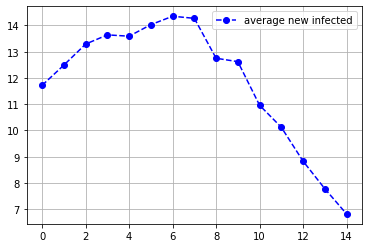

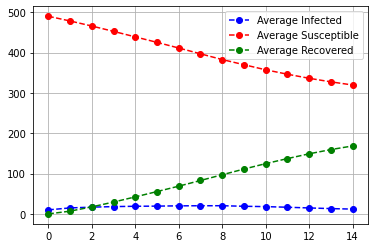

In [ ]:
plotFunction(n_inf, inf, rec, susc, 100, vac = None)

We can see how the new_infected growth in the first weeks and then progressivly go down: this is expected in a SIR Model, when we have high contagious firts but, at infinite time, if we have some infected at time 0, we have that all the nodes belong to $R$.
Clearly, we can notice it from the second graph, 15 weeks are not enoguh to end the pandemic:
we reached more or less 300 susceptible, around 200 recovered and the number of infected is close to 10 at the end. This sugges us that the parameter $\rho$ is high enough, and $\beta$ is small, to keep the pandemic under controll. 

### Exercise 1.2

We generate a random graph by the preferential attachment model. We start with with an initial graph $G_1$, that is complete with $k+ 1$ nodes.
At every $time\_step≥2$, a new node is added at time $t$  and will have a degree $w_t(t)  =c=k/2$.   Hence,  the funcion added $c$ undirected  links  to node in the  existing  graph $G_{t−1}$. 
The links are choosen randomly, proportional to the in-degree distribution of $G_{t}$. 
We implement 2 different stopping condition:
* the first one is based on the total function runtime: as input paramether is taken the variable $sec$ that defines the runtime. When it is reached the run is stopped and the obtained graph is returned. This allow to define "how large the graph should be" without fixing an exact number of nodes.

* the second one take as paramether the number of nodes and so it runs until this number is reached.

In [ ]:
def createRandomNetwork(k,sec = 30, max = None):

    Gr = nx.complete_graph(k + 1)

    c = int(k/2)
    endTime = datetime.now() + timedelta(seconds=sec)
    while True:
        if max is None and datetime.now() >= endTime:
            break
        elif max is not None and len(Gr) >= max:
            break
            
        w = [val for (node, val) in Gr.degree()]
        tot = sum(w)
        prob_nodes = np.array(w)/tot
        
        newNode = len(Gr)

        sel = np.random.choice(Gr.nodes, size = c, 
                               replace = False, p=list(prob_nodes))

        Gr.add_edges_from([(newNode, el) for el in sel])
    return Gr,k

In [ ]:
#nx.barabasi_albert_graph(nNodes, k, seed=None)k = 5
#sec = 30
#Graph, avgDegree = createRandomNetwork(k,sec, max = None)

It's also possible generate the random graph using the barabasi_albert_graph(n, m, seed=None) function of $networkx$ that returns a random graph generated according to the Barabási Albert preferential attachment model.
A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree. The main difference from our implementation is that the networkx version start with an empty graph, instead our that start with a complete graph. Beacuse of the computational complexity of some task it was usefull to use also this function , that is really fast. 

### Exercise 2



#### Case 1: One randomly generated graph.
With the same strategy adopted in 1.1 we simulate the pandemic model on the randomly generated graph with avarage degree equal to 6 and 500 nodes. 
At first we generate one graph before the simulation and we adopt this for all the 100 iterations made by 15 weeks. 

In [ ]:
k = 6
nNodes = 500
Graph,avg_deg = createRandomNetwork(k, max = nNodes)
beta = .3
ro = .7
weeks = 15

In [ ]:
n_inf = []
inf= []
rec = []
susc = []

for j in range(100):
    fi_nodes = np.random.choice(Graph.nodes, size = fi, replace = False)
    infected = set(fi_nodes)
    recovered = set()
    susceptible =  set(range(nNodes)) - set(infected) - set(recovered) 
    
    for i in range(15): #15 weeks
        new_infected = []
        new_recovered = []
        for el in susceptible:
            if( becameInfected(el, infected, Graph, ro, beta) ):
                new_infected.append(el)
        for el in infected:
            if( becameRecovery(el, Graph, ro, beta)):
                new_recovered.append(el)
                
        n_inf.append(len(new_infected))
        inf.append(len(infected))
        rec.append(len(recovered))
        susc.append(len(susceptible))
        
        infected = infected.union( set(new_infected) ) - set(new_recovered) 
        recovered = recovered.union( set(new_recovered) )
        susceptible =  set(susceptible) - set(new_infected) - set(new_recovered)

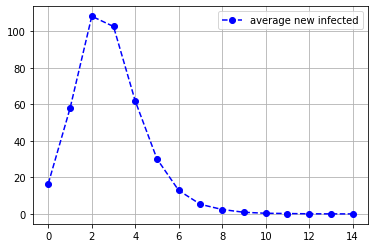

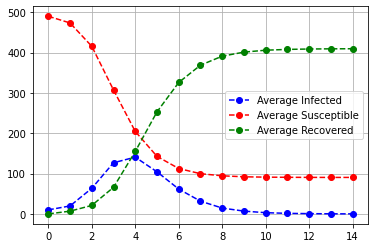

In [ ]:
plotFunction(n_inf, inf, rec, susc, 100, vac = None)

Observing those graphs, we can do tha same considerations as before: let's highlight that, ath each step, the sum of Infected, Susceptible and Recovered is equal to the number of nodes


#### Case 2: At Each simulation generate a new random graph.
We also reapet the simulation but at each iteration we create a new random generated graph. This approach give us the opportunity to evaluate if short changes in the graph can lead to big differences in the model

In [ ]:
k = 6
nNodes = 500
beta = .3
ro = .7
weeks = 15

In [ ]:
n_inf = []
inf= []
rec = []
susc = []

for j in range(100):
    Graph, avgDegree = createRandomNetwork(k, max = nNodes)
    fi_nodes = np.random.choice(Graph.nodes, size = fi, replace = False)
    infected = set(fi_nodes)
    recovered = set()
    susceptible =  set(range(nNodes)) - set(infected) - set(recovered) 
    
    for i in range(15): #15 weeks
        new_infected = []
        new_recovered = []
        for el in susceptible:
            if( becameInfected(el, infected, Graph, ro, beta) ):
                new_infected.append(el)
        for el in infected:
            if( becameRecovery(el, Graph, ro, beta)):
                new_recovered.append(el)
                
        n_inf.append(len(new_infected))
        inf.append(len(infected))
        rec.append(len(recovered))
        susc.append(len(susceptible))
        
        infected = infected.union( set(new_infected) ) - set(new_recovered) 
        recovered = recovered.union( set(new_recovered) )
        susceptible =  set(range(n_nodes)) - set(infected) - set(recovered) 

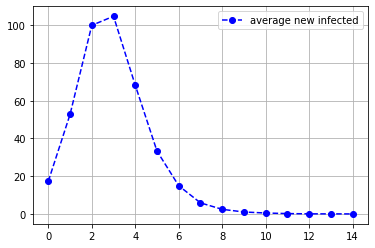

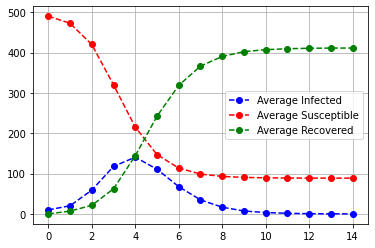

In [ ]:
plotFunction(n_inf, inf, rec, susc, 100, vac = None)

From the graphs we can see that there aren't big variations by changing the graph, so we can trust that our model is reliable

### Exercise 3

In order to slow down the epidemic expansion some parts of the population will receive vaccination. Once a person is vaccinated it cannot be infected. Furthermore, the vaccination is assumed to take effect immediately once
given. Beacuse of the fact that the simulations referred to the first 15 weeks of pandemic we decide to do not select for the vaccination recovered nodes. If the task is to slow down pandemic expasion recovered people will be vaccined later.
The total fraction of population that received vaccination by each week is calculated according  to: 
$$Vacc(t) = [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60].$$
To simulate the actual vaccination we ,at the beginning of each week, find the correct number of individuals to vaccinate according to Vacc(t).Then we find individuals to vaccinate. We select randomly nodes who will recive vaccination  between suceptible and infected ones . 
Update the list of susceptible and infected nodes by removing who has recived the vaccination then we repet the same procedure as before.

In [ ]:
k = 6
nNodes = 500
Graph, avgDegree = createRandomNetwork(k, max = nNodes)
beta = .3
ro = .7
weeks = 15

In [ ]:
n_inf = []
inf= []
rec = []
susc = []
vac = []
to_vac = [0, 5, 10, 10, 10, 10, 10, 5, 0, 0, 0, 0, 0, 0, 0]

for j in range(100):
    fi_nodes = np.random.choice(Graph.nodes, size = fi, replace = False)
    infected = set(fi_nodes)
    recovered = set()
    susceptible =  set(range(nNodes)) - set(infected) - set(recovered) 
    vaccinable = set(range(nNodes))
    vaccined = set()

    for i in range(15): #15 weeks
        new_infected = []
        new_recovered = []

        v = int(nNodes * to_vac[i]/ 100) 
        #v->numero di utenti da vaccinare la i-esima settimana
        v = min(v, len(vaccinable) )
        
        #definisco chi vaccinare
        new_vaccinated =  np.random.choice(list(vaccinable), 
                                           size = v, replace = False) 
        #estraggo casualmente v utenti vaccinabili
        
        #se uno è vaccinato, non può più nè diventare infetto e neppure contagiare
        susceptible = set(susceptible) - set(new_vaccinated) 
        infected = set(infected) - set(new_vaccinated)
        vaccined = set(vaccined).union( set(new_vaccinated) )


        for el in susceptible:
            if( becameInfected(el, infected, Graph, ro, beta) ):
                new_infected.append(el)
        for el in infected:
            if( becameRecovery(el, Graph, ro, beta)):
                new_recovered.append(el)
                
        n_inf.append(len(new_infected))
        inf.append(len(infected))
        rec.append(len(recovered))
        susc.append(len(susceptible))
        vac.append(len(vaccined))
        
        infected = infected.union( set(new_infected) ) - set(new_recovered) 
        recovered = recovered.union( set(new_recovered) )
        susceptible =  set(susceptible) - set(new_infected) - set(new_recovered)
        vaccinable = set(vaccinable) - set(new_recovered) - set(new_vaccinated) 
        

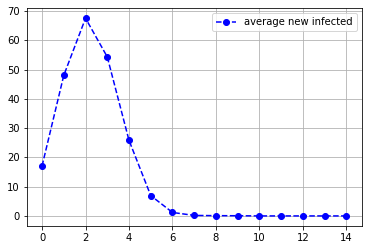

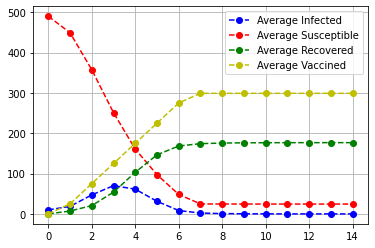

In [ ]:
plotFunction(n_inf, inf, rec, susc, 100, vac)

The maximum number of new infected is, by using vaccination, lower that in the other cases. We can also see that the curve go down faster and before then previously examinated cases.

We anticipated fo 2 days also the 0-infected curve, and because of the fact that vaccination regards both infected and susceptible, we have no more of both at the end of the simulation.

### Exercise 4

The model described so far depends on 3 hyperparameters:
* $k$, the average degree
* $\rho$, the recovered probability
* $\beta$, the probability of being infected
Until now, we worked with fixed and arbitatrary values for those. \\

By looking at the true values of new infected during the Sweden 2009 pandemic, let's try to estimate the true parameters that better represent the real virus:

In [ ]:
def executionFunction(k,beta,ro, nNodes, iters=10, plot = False):
    real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

    Graph, avgDegree = createRandomNetwork(k, max = nNodes)
    
    weeks = 15
    fi = 1
    
    n_inf = []
    inf= []
    rec = []
    susc = []
    vac = []
    to_vac = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]
  
    for j in range(iters):
        fi_nodes = np.random.choice(Graph.nodes, size = fi, replace = False)
        infected = set(fi_nodes)
        recovered = set()
        susceptible =  set(Graph.nodes) - set(infected) - set(recovered) 
        vaccinable = set(Graph.nodes)
        vaccined = set()
        n_inf.append(1)
        for i in range(15): #15 weeks
            new_infected = []
            new_recovered = []

            v = int(nNodes * to_vac[i]/ 100) 
            #number of user that will recive the vaccination at the i-th week 
            v = min(v, len(vaccinable) )

            #choose random who will recive the vaccination during this week 
            new_vaccinated =  np.random.choice(list(vaccinable), 
                                               size = v, replace = False) 
            

            #if a user recive the vaccintaion it's not going to infect or 
            #became infacted during this and the next week
            susceptible = set(susceptible) - set(new_vaccinated) 
            infected = set(infected) - set(new_vaccinated)
            vaccined = set(vaccined).union( set(new_vaccinated) )


            for el in susceptible:
                if( becameInfected(el, infected, Graph, ro, beta) ):
                    new_infected.append(el)
            for el in infected:
                if( becameRecovery(el, Graph, ro, beta)):
                    new_recovered.append(el)

            n_inf.append(len(new_infected))

            inf.append(len(infected))
            rec.append(len(recovered))
            susc.append(len(susceptible))
            vac.append(len(vaccined))

            infected = infected.union( set(new_infected) ) - set(new_recovered) 
            recovered = recovered.union( set(new_recovered) )
            susceptible =  set(susceptible) - set(new_infected)
            vaccinable = set(vaccinable) - set(recovered) - set(new_vaccinated) 
    
    #calculate RMSE
    
    x = np.mean(np.reshape(n_inf, (iters,16)), axis = 0)
    average_new_infected = np.array(x, dtype=int)
    rms  = np.sqrt(1/15* np.sum((average_new_infected - real_n_inf)**2))
    if plot == False:
        return rms
    else:
        return (rms,n_inf,inf,rec,susc,vac)
    

In [ ]:
nNodes = 934
iterazioni = 10

#parameters:
k_0 = 10
beta_0 = .3
ro_0 = .6
delta_k_0 = 1
delta_beta_0 = .1
delta_ro_0 = .1

flag = True

while flag:
    rms = []
    ks = [k_0, k_0 + delta_k_0, k_0 - delta_k_0]
    betas = [beta_0, beta_0 + delta_beta_0, beta_0 - delta_beta_0]
    ros = [ro_0, ro_0 + delta_ro_0, ro_0 - delta_ro_0]
    for k in ks:
      for beta in betas:
        for ro in ros:
          loss = executionFunction(k, beta, ro, nNodes, iterazioni, plot=False)
          rms.append([k, beta, ro, loss])

    rms.sort( key = lambda x: x[3])
    bestK, bestBeta, bestRo, bestRMS = rms[0]
    if(bestK == k_0 and bestBeta == beta_0 and bestRo == ro_0):
        print('FINISH')
        flag = False
    else:
        if(bestK != k_0):
            k_0 = bestK
            delta_k_0 = int(delta_k_0 /2)
        if(bestBeta != beta_0):
            print('Update beta_0')
            beta_0 = bestBeta
            delta_beta_0 /=2
        if(bestRo == ro_0):
            print('Update ro_0')
            ro_0 = bestRo
            delta_ro_0 /= 2
print(bestK, bestBeta, bestRo, bestRMS)

Update beta_0
Update ro_0
FINISH
9 0.19999999999999998 0.6 4.449719092257398


rms 4.024922359499621


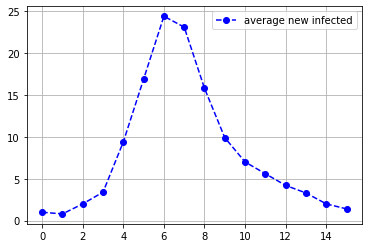

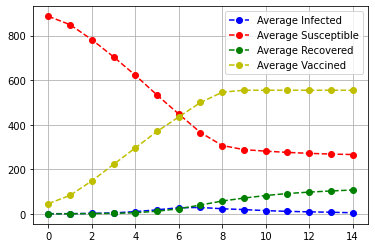

In [ ]:
nNodes = 934
iterazioni = 10

rms,n_inf,inf,rec,susc,vac = executionFunction(bestK,
                                               bestBeta,bestRo, 
                                               nNodes, iterazioni, plot = True)
print('rms',rms)
plotFunction(n_inf, inf, rec, susc, iterazioni, vac, n = 16)

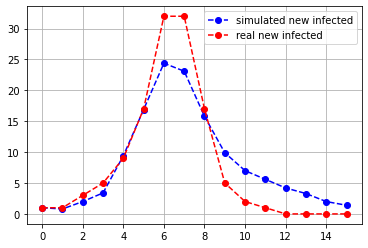

In [ ]:
average_new_infected = np.mean(np.reshape(n_inf, (iterazioni,16)), axis = 0)
real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0,0]
plt.plot(range(16),average_new_infected, linestyle='--', marker='o', 
         color='b', label ='simulated new infected')
plt.plot(range(16),real_n_inf, linestyle='--', marker='o', 
         color='r', label ='real new infected')
plt.legend()
plt.grid(True)
plt.show()

Looking at the graph its clear that the fine-tunining lead to a good solution; but it's clear that the simulated graph under-estimate the new-infected (it can be a problem of a too low $\beta$); but the curve shape fitted the original one.

### Exercise 5

From previus results we have understood the pre-defined graph is not a good representation for social network. 
In paper [1] there is an analysis of best network to represent social; it's clear the fact that society is better modelled by community network, that are structure in which we can reconize different comunities and edges among them. 
A community is a dense set of nodes. Communities are related one to each other by sparse edges. 

Let's try to apply this model also to Swedish Society.

In order to define the graph as similar as possibile to the swedish society, we start from a list of all regions in Sweden, each one characterized by the population density and by the distances in km to all the other ones. 
Each region defines a comunity; the number of edges and the average degree are related to the population density;

All the data are aveilable at [2],[3].

We didn't find all the data about 2009, so we based our model on the ones available, related to year 2019. 
We have defined that this data are trustable because, by looking at [4], we can see that in the last decade the average density in Sweden is remained more or less the same.

**Regional graphs** \\

Starting from that data, we creat a graph for each region: the selected model was **barbasi_albert graph**, in which the number of nodes and the average degrees are the ones defined thanks to the population density. 
Looking at these disjoint graphs, first we try to estimate the pandemic paramethers $\rho$ and $\beta$ in order to figure out the performance obtained by this particular structure. \\

**Community interconnections** \\

Then we create links among regions as follows: \\
1. We define the $out-degree$ dictionary that, for each pair of regions, stored the number of links connecting them. This number is calculated taking into account the distances and the minimum population density of the two current regions. 
2. For each region, we select only the first 5 nearest regions. Then, called $n$ the out average degree, for each region pair there are selected $n$ nodes pairs and there are added links among them



**Random edges** \\

In paper [5] there is an alasysis about Social Network graph representations. The authors analyzing the fact that, in a true social network the number of nodes can be considered fixed in some cases. This is true in our 15 weeks analysis, because it is difficult to have entering and exiting nodes especially considering that each node represent 1000 persons. 
This stationarity is not true for edges, for which we have that connection among individuals are made and unmade very quicly. 
In our model, for example, we can have that among the 15 weeks the relations are not always the same: people travel, exit home and meet people that aren't usally in their "social bubble". This kind of interconnetion are not fixed and ever present. So it can be a good idea to try to simulate this variety by adding, at each week, temporary edges among nodes in the whole graph. 
We have tried to simulate that fact by using a special function $addRandomEdges()$:
a fixed number of edges (proportional to graph lenght) is added randomly each week and, after the computation, the same link as removed.


For the three cases, the hyperparamethers are fine tuned by a grid search. 

#### **References**
* [1] Radicchi, Filippo & Castellano, Claudio & Cecconi, Federico & Loreto, Vittorio & Parisi, Domenico. (2004). 
<A HREF="https://www.researchgate.net/publication/5248536_Defining_and_identifying_communities_in_networks">Defining and identifying communities in networks. Proceedings of the National Academy of Sciences of the United States of America. </A>
* [2] https://docs.google.com/spreadsheets/d/1yEhVAcDUorUP2PjEl9kmMPOKIw8OEqvSTczCuf4ULco/edit?usp=sharing \\
* [3] https://www-statista-com.ezproxy.biblio.polito.it/statistics/526655/sweden-population-by-county/
* [4] https://www-statista-com.ezproxy.biblio.polito.it/statistics/523870/sweden-population-density/
* [5] Yannis M. Ioannides, 2005.
"<A HREF="https://ideas.repec.org/p/tuf/tuftec/0518.html">Random Graphs and Social Networks: An Economics Perspective</A>,"
<A HREF="https://ideas.repec.org/s/tuf/tuftec.html">Discussion Papers Series, Department of Economics, Tufts University</A> 
0518, Department of Economics, Tufts University.

#### Define useful functions

In [ ]:
def mapping(x):
  return region + '_' + str(x)

In [ ]:
def norm(mu, sigma, x):
  a = math.sqrt(2 * math.pi * (sigma**2))
  b = ( (x - mu)**2) /(2*(sigma**2))
  return (1/a)*math.exp(-b)

In [ ]:
def externalDegree(dfPopSweden, r1, r2):
  mu = 0
  sigma = 1
  n = min( dfPopSweden.loc[r1]['densità'], dfPopSweden.loc[r2]['densità'] )
  distanza = dfPopSweden.loc[r1][r2]
  p = norm(mu, sigma, distanza/1478)
  return round(n*p)

#### Regional Graph creation

In [ ]:
dfPopSweden = pd.read_csv('popSweden.csv')
dfPopSweden = dfPopSweden.set_index(['regioni'])

In [ ]:
all_regions = ['Stockholm','Skåne','Västra Götaland','Halland','Blekinge','Västmanland','Södermanland','Uppsala','Östergötland','Örebro','Jönköping','Kronoberg','Kalmar','Gotlands','Värmland','Gävleborg','Västernorrland','Dalarna','Västerbotten','Jämtland','Norrbotten']

In [ ]:
out_degree = {}
for region1 in list(dfPopSweden.index):
  out_degree[region1] = {}
  for region2 in list(set(all_regions) - set([region1])):
    out_degree[region1][region2] = externalDegree(dfPopSweden, region1, region2)    

In [ ]:
#creazione dei grafi regionale
listOfGraphs = {}
for region in list(dfPopSweden.index):
  nNodes = dfPopSweden.loc[region]['nNodes']
  avg_degree = dfPopSweden.loc[region]['avg_degree']
  Graph = nx.barabasi_albert_graph(nNodes, int(avg_degree), seed=None)
  Graph = nx.relabel_nodes(Graph,mapping)
  listOfGraphs[region] = Graph

In [ ]:
#unione dei grafi in un unico grafo
total_Graph = nx.Graph()
for region in list(dfPopSweden.index):
  total_Graph.add_nodes_from( listOfGraphs[region].nodes() )
  total_Graph.add_edges_from( listOfGraphs[region].edges() )

In [ ]:
for k,v in out_degree.items():
  out_degree[k] = dict(sorted(v.items(), key=operator.itemgetter(1), reverse=True)[:5])

In [ ]:
len(total_Graph.edges())

8679

##### Analysis

In [ ]:
nNodes = len(total_Graph)
iterazioni = 10

rms = []
betas = np.linspace(0.1,0.3,20)
ros = np.linspace(0.3, 0.8, 20)

for beta in betas:
  for ro in ros:
    x = executionFunction(beta,ro, nNodes, 
                          iterazioni, plot=True, Graph = total_Graph)
    loss = x[0]
    supportPlot = x[1:]
    rms.append([ro, beta, loss, supportPlot])
rms.sort( key = lambda x: x[2])
bestRo, bestBeta, bestRMS, bestPlot = rms[0]

print(bestBeta, bestRo, 'result =', bestRMS)

0.1105263157894737 0.3526315789473684 result = 5.555777773333511


In [ ]:
z = []
x = []
y = []
for el in rms:
  x.append(el[0])
  y.append(el[1])
  z.append(el[2])
z = np.reshape(z, (20, 20) )

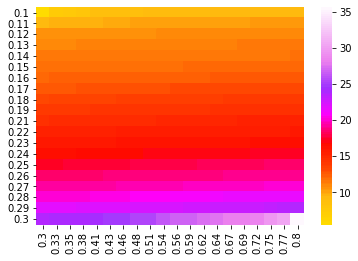

In [ ]:
heatmap_plot = sns.heatmap(z, center=0, cmap='gist_ncar', 
                           xticklabels=np.around(ros, 2), 
                           yticklabels=np.around(betas, 2))
plt.show()

By plotting the heatmap, which has $\rho$ values in the $x$ axis and $\beta$ values on the $y$ one, it is possible to see that smaller values are the one performing better. \\
This is expected, because of the high number of nodes and the high density inside communities: higher $\beta s$ can lead to a too fast epidemic spread; the values of $\rho$ are strictly related to $\beta s$: when larger $\beta s$ are combined with small $\rho s$, we have a epidemic that spread faster and faster. While the opposite create a very slow epidemic, that go estinguish in a short time. 

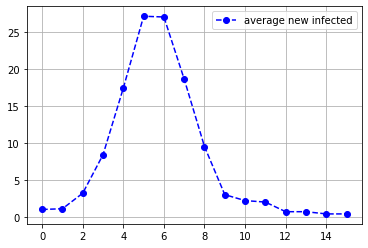

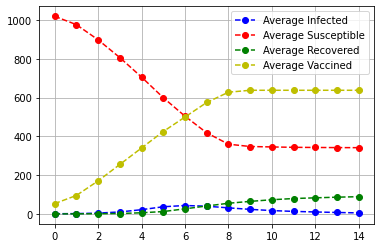

In [ ]:
n_inf,inf,rec,susc,vac = bestPlot
plotFunction(n_inf, inf, rec, susc, iterazioni, vac,n=16)

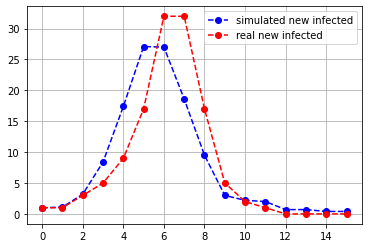

In [ ]:
average_new_infected = np.mean(np.reshape(n_inf, (iterazioni,16)), axis = 0)
real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0,0]
plt.plot(range(16),average_new_infected, linestyle='--', marker='o', color='b', label ='simulated new infected')
plt.plot(range(16),real_n_inf, linestyle='--', marker='o', color='r', label ='real new infected')
plt.legend()
plt.grid(True)
plt.show()

This simulation represents relativly well the real situation: we can see that the simulation is translated and shorter the the real one, but the tails are well overlapped and also the shape is very similar

#### Interconnections among communities

In [ ]:
for k,v in out_degree.items():
  out_degree[k] = dict(sorted(v.items(), key=operator.itemgetter(1), reverse=True)[:5])

In [ ]:
#aggiungi link tra i vari grafi
for region1 in list(dfPopSweden.index):
  for region2 in out_degree[region1]:
     n = out_degree[region1][region2] 
     #pensare al fatto che la matrice è simmetrica: aggiungi il doppio degli archi se non stai attenta
     l1 = np.random.choice(listOfGraphs[region1].nodes(), int(n/2), replace=True)
     l2 = np.random.choice(listOfGraphs[region2].nodes(), int(n/2), replace=True)
     total_Graph.add_edges_from( zip(l1,l2))

##### Analysis

In [ ]:
nNodes = len(total_Graph)
iterazioni = 10

rms = []
betas = np.linspace(0.1,0.3,20)
ros = np.linspace(0.3, 0.8, 20)

for beta in betas:
  for ro in ros:
    x = executionFunction(beta,ro, nNodes, iterazioni, plot=True, Graph = total_Graph)
    loss = x[0]
    supportPlot = x[1:]
    rms.append([ro, beta, loss, supportPlot])
rms.sort( key = lambda x: x[2])
bestRo, bestBeta, bestRMS, bestPlot = rms[0]

print(bestBeta, bestRo, 'result =', bestRMS)

0.15263157894736842 0.6157894736842104 result = 5.0990195135927845


In [ ]:
bestRo, bestBeta, bestRMS

(0.6157894736842104, 0.15263157894736842, 5.0990195135927845)

In [ ]:
z = []
x = []
y = []
for el in rms:
  x.append(el[0])
  y.append(el[1])
  z.append(el[2])
z = np.reshape(z, (20, 20) )

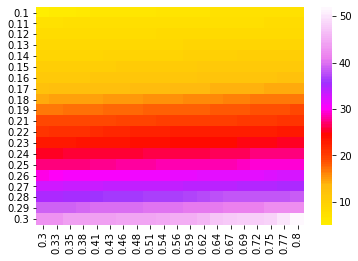

In [ ]:
heatmap_plot = sns.heatmap(z, center=0, cmap='gist_ncar', 
                           xticklabels=np.around(ros, 2), 
                           yticklabels=np.around(betas, 2))
plt.show()

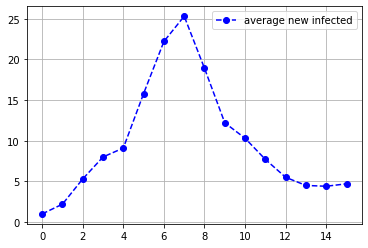

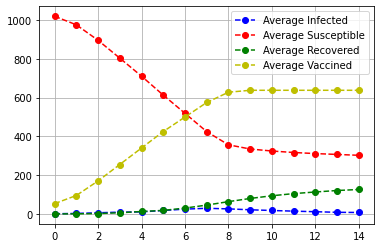

In [ ]:
n_inf,inf,rec,susc,vac = bestPlot
plotFunction(n_inf, inf, rec, susc, iterazioni, vac,n=16)

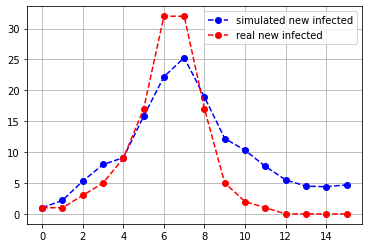

In [ ]:
average_new_infected = np.mean(np.reshape(n_inf, (iterazioni,16)), axis = 0)
real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0,0]
plt.plot(range(16),average_new_infected, linestyle='--', marker='o', color='b', label ='simulated new infected')
plt.plot(range(16),real_n_inf, linestyle='--', marker='o', color='r', label ='real new infected')
plt.legend()
plt.grid(True)
plt.show()

Adding interconnection among different regions is well-paid: we still have an under-estimation of weekly new infected, but we eliminated the translation and the obtained curve fitted very well the real one. 

#### Random edges 

In [ ]:
def addRandomEdges(G):
  k = int(len(G)/30)
  e = list(itertools.combinations(G.nodes(), 2))
  a = np.random.choice(range(len(e)), size = k, replace = False)
  e = [e[i] for i in a]
  e = set(e) - set(G.edges())
  G.add_edges_from(e)
  return e

In [ ]:
def executionFunction_rn(beta,ro, nNodes, iters,plot=False, Graph = None):
    real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]
    weeks = 15
    fi = 1
    n_inf = []
    inf= []
    rec = []
    susc = []
    vac = []
    to_vac = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]

    for j in range(iters):
        fi_nodes = np.random.choice(Graph.nodes, size = fi, replace = False)
        infected = set(fi_nodes)
        recovered = set()
        susceptible =  set(Graph.nodes) - set(infected) - set(recovered) 
        vaccinable = set(Graph.nodes)
        vaccined = set()
        n_inf.append(1)
        for i in range(15): #15 weeks
            new_edges = addRandomEdges(Graph)
            new_infected = []
            new_recovered = []

            v = int(nNodes * to_vac[i]/ 100) 
            #numero di utenti da vaccinare la i-esima settimana
            v = min(v, len(vaccinable) )

            #definisco chi vaccinare
            new_vaccinated =  np.random.choice(list(vaccinable), 
                                               size = v, replace = False) 
            #estraggo casualmente v utenti vaccinabili

            #se uno è vaccinato, non può più nè diventare infetto 
            #e neppure contagiare
            susceptible = set(susceptible) - set(new_vaccinated) 
            infected = set(infected) - set(new_vaccinated)
            vaccined = set(vaccined).union( set(new_vaccinated) )


            for el in susceptible:
                if( becameInfected(el, infected, Graph, ro, beta) ):
                    new_infected.append(el)
            for el in infected:
                if( becameRecovery(el, Graph, ro, beta)):
                    new_recovered.append(el)

            n_inf.append(len(new_infected))
            inf.append(len(infected))
            rec.append(len(recovered))
            susc.append(len(susceptible))
            vac.append(len(vaccined))

            infected = infected.union( set(new_infected) ) - set(new_recovered) 
            recovered = recovered.union( set(new_recovered) )
            susceptible =  set(susceptible) - set(new_infected)
            vaccinable = set(vaccinable) - set(recovered) - set(new_vaccinated) 
            Graph.remove_edges_from(new_edges)
    
    #calcolo RMSE
    x = np.mean(np.reshape(n_inf, (iters,16)), axis = 0)
    average_new_infected = np.array(x, dtype=int)
    rms  = np.sqrt(1/15* np.sum((average_new_infected - real_n_inf)**2))
    print('rms =',rms)
    if plot == False:
        return rms
    else:
        return (rms,n_inf,inf,rec,susc,vac)

##### Analysis

In [ ]:
nNodes = len(total_Graph)
iterazioni = 10

rms = []
betas = np.linspace(0.1,0.3,20)
ros = np.linspace(0.3, 0.8, 20)

for beta in betas:
  for ro in ros:
    x = executionFunction_rn(beta,ro, nNodes, iterazioni, plot=True, Graph = total_Graph)
    loss = x[0]
    supportPlot = x[1:]
    rms.append([ro, beta, loss, supportPlot])
rms.sort( key = lambda x: x[2])
bestRo, bestBeta, bestRMS, bestPlot = rms[0]

In [ ]:
bestRo, bestBeta, bestRMS

(0.5368421052631579, 0.14210526315789473, 5.092478113191389)

In [ ]:
z = []
x = []
y = []
for el in rms:
  x.append(el[0])
  y.append(el[1])
  z.append(el[2])
z = np.reshape(z, (20, 20) )

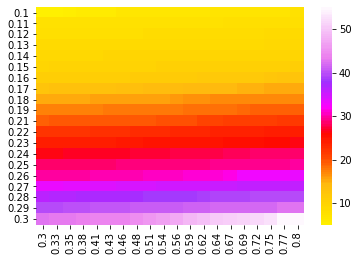

In [ ]:
heatmap_plot = sns.heatmap(z, center=0, cmap='gist_ncar', 
                           xticklabels=np.around(ros, 2), 
                           yticklabels=np.around(betas, 2))
plt.show()

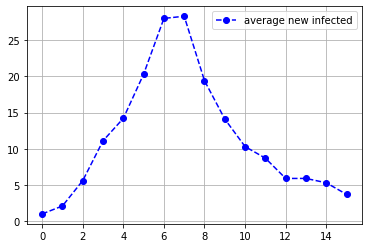

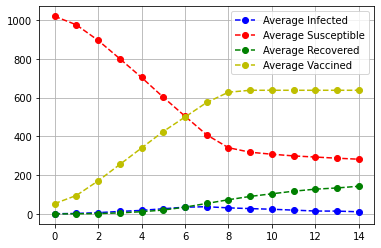

In [ ]:
n_inf,inf,rec,susc,vac = bestPlot
plotFunction(n_inf, inf, rec, susc, iterazioni, vac,n=16)

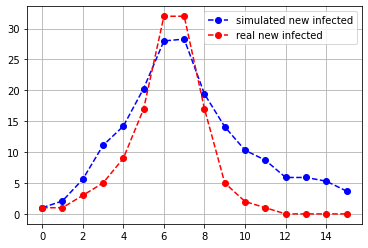

In [ ]:
average_new_infected = np.mean(np.reshape(n_inf, (iterazioni,16)), axis = 0)
real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0,0]
plt.plot(range(16),average_new_infected, linestyle='--', marker='o', color='b', label ='simulated new infected')
plt.plot(range(16),real_n_inf, linestyle='--', marker='o', color='r', label ='real new infected')
plt.legend()
plt.grid(True)
plt.show()

Also this analysis is very interesting: we can notice that adding random weekly edges generates a good simulation, increasing the number of new infected and creating an overlapper curve than the real one;
the result is not perfect yet, but maybe a stronger fine tuning could lead to better results.
Another option is to taking care of how the Swedish society is organized and use weighted edges in order to represent relationship more precisely:
for example, the average number of people living in the same house is 2, so each node should have a mean of 2 edges with maximum weight. Then it will be good to find other informations and construct a set of rules in order to assign weights.
Then, the functiond *BecameInfected* should define the probability of being infected not only depending on the number of neighbors infected, but also looking at the strenght of this links